In [2]:
import numpy as np
import pandas as pd

# ---------- reference data ----------
ref_file = "xxz_2x2_correlations_ref.csv"
ref_df = pd.read_csv(ref_file)

# ensure numeric
for col in ["delta", "czz_diag", "cxx_diag"]:
    if col in ref_df.columns:
        ref_df[col] = pd.to_numeric(ref_df[col], errors="coerce")

ref_df = ref_df.sort_values("delta").reset_index(drop=True)

deltas_ref = ref_df["delta"].to_numpy()
czz_ref    = ref_df["czz_diag"].to_numpy()
cxx_ref    = ref_df["cxx_diag"].to_numpy()

# ---------- RBM data ----------
rbm_file = "xxz_4x4_correlations_rbm_fixed.csv"
rbm_df = pd.read_csv(rbm_file)

# normalize 'type' column
if "type" in rbm_df.columns:
    rbm_df["type"] = rbm_df["type"].astype(str).str.strip().str.lower()

# ensure numeric
for col in ["delta", "czz_diag", "czz_diag_error", "cxx_diag", "cxx_diag_error"]:
    if col in rbm_df.columns:
        rbm_df[col] = pd.to_numeric(rbm_df[col], errors="coerce")

# split into support vs novel
df_support = rbm_df[rbm_df["type"] == "support"].sort_values("delta").reset_index(drop=True)
df_novel   = rbm_df[rbm_df["type"] == "novel"].sort_values("delta").reset_index(drop=True)

# support arrays
deltas_support      = df_support["delta"].to_numpy()
czz_support         = df_support["czz"].to_numpy()
cxx_support         = df_support["cxx"].to_numpy()

# novel arrays
deltas_novel        = df_novel["delta"].to_numpy()
czz_novel           = df_novel["czz"].to_numpy()
cxx_novel           = df_novel["cxx"].to_numpy()

# preview for sanity check
display_cols = [c for c in ["type", "delta", "czz_diag", "cxx_diag"] if c in rbm_df.columns]
rbm_preview = rbm_df[display_cols].sort_values(["delta", "type"]).reset_index(drop=True)
rbm_preview.head()


,type,delta
0,support,0.4
1,novel,0.5
2,support,0.6
3,novel,0.7
4,support,0.8


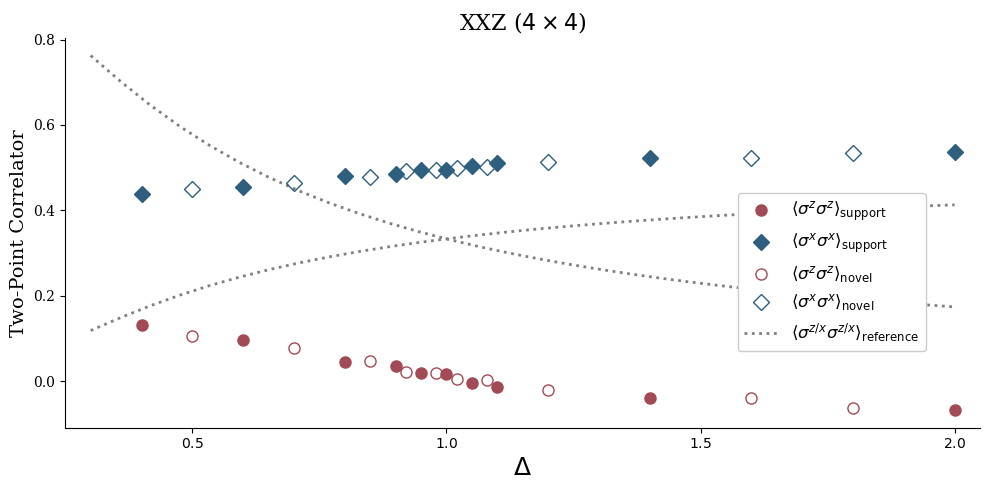

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# final curve style
english_red = '#a24a55'
bdazzled_blue = '#2e5f7f'
plt.rcParams.update({"font.family": "serif"})

fig, ax = plt.subplots(figsize=(10, 5), facecolor='white')
ax.set_facecolor('white')

# reference curves
ax.plot(deltas_ref, czz_ref, ':', color='gray', linewidth=2.0,
        label='_nolegend_', zorder=1)
ax.plot(deltas_ref, cxx_ref, ':', color='gray', linewidth=2.0,
        label='_nolegend_', zorder=1)

# support points
ax.plot(deltas_support, czz_support, 'o', color=english_red, markersize=8,
        label=r'$\langle \sigma^z \sigma^z \rangle_{\mathrm{support}}$', zorder=2)
ax.plot(deltas_support, cxx_support, 'D', color=bdazzled_blue, markersize=8,
        label=r'$\langle \sigma^x \sigma^x \rangle_{\mathrm{support}}$', zorder=2)

# novel points
ax.plot(deltas_novel, czz_novel, 'o',
        markerfacecolor='none', markeredgecolor=english_red, markersize=8,
        label=r'$\langle \sigma^z \sigma^z \rangle_{\mathrm{novel}}$', zorder=2)
ax.plot(deltas_novel, cxx_novel, 'D',
        markerfacecolor='none', markeredgecolor=bdazzled_blue, markersize=8,
        label=r'$\langle \sigma^x \sigma^x \rangle_{\mathrm{novel}}$', zorder=2)

# proxy curve for both reference lines in legend
ax.plot([], [], ':', color='gray', linewidth=2.0,
        label=r'$\langle \sigma^{z/x} \sigma^{z/x} \rangle_{\mathrm{reference}}$')

ax.set_xlabel(r'$\Delta$', fontsize=18)
ax.set_ylabel('Two-Point Correlator', fontsize=14)
ax.set_title(r"XXZ ($4 \times 4$)", fontsize=16)

# ---- tighten x-range to remove empty space ----
all_deltas = np.concatenate([deltas_ref, deltas_support, deltas_novel])
d_min, d_max = float(np.nanmin(all_deltas)), float(np.nanmax(all_deltas))

ax.set_xlim(d_min - 0.05, d_max + 0.05)

# ticks starting at the first half-step >= d_min
xticks = np.arange(np.ceil(d_min * 2) / 2,
                   np.floor(d_max * 2) / 2 + 0.01,
                   0.5)
ax.set_xticks(xticks)
ax.set_xticklabels([f"${x:.1f}$" for x in xticks])

ax.legend(frameon=True, framealpha=1, loc='center right',
          bbox_to_anchor=(0.95, 0.4), fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('xxz_correlators_highres.png', dpi=300)
plt.show()